## Rectificador Monofásico de Onda Completa
### Para una carga Inductiva

$\alpha < \omega t < \beta$

$\chi = \frac{E}{V_m}$

$\omega t = \alpha$

Se importan todas las liberías necesarias.

In [51]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

Parámetros de entrada.

In [52]:
Vs = 120        # V (rms)
E = 10          # V (DC)
Freq = 60       # Hz

R = 2.5         # ohms
L = 6.5e-3      # Henries

Se calculan los valores iniciales.

In [53]:
omega = 2 * math.pi * Freq   # angular freq. (rad/s)
Vm = Vs * math.sqrt(2)  # Voltaje Maximo
Z = math.sqrt(R**2 + (omega*L)**2)  # impedancia de la carga
theta = math.atan2((omega*L), R)      # angulo de impedancia de la carga
chi = E / Vm        # relacion de voltaje
alpha = math.asin(chi)

Se genera un arreglo con los ángulos a probar.

In [54]:
angles = np.arange(math.pi/2.0, 2*math.pi, 1e-3)

Se crea una lista con todos los cálculos para los ángulos dados y se convierten a grados sexagesimales.

In [55]:
temp = [math.sin(beta - theta)
        + (chi/math.cos(theta) - math.sin(alpha - theta))
        * math.exp((alpha - beta) / math.tan(theta))
        - chi/math.cos(theta) for beta in angles]

angles = np.degrees(angles)

El valor mínimo de esta lista nos entrega el ángulo $\beta$.

In [56]:
res = [abs(ele) for ele in temp]
x0, y0 = (angles[res.index(min(res))], temp[res.index(min(res))])

xtext, ytext = (max(angles) / 10.0, max(res) / 4.0)

print('El valor de Beta es {:.2f}'.format(x0))

El valor de Beta es 220.58


Finalmente, se grafica la salida para cada valor del ángulo $\beta$ y se muestra el punto que representa la solución.

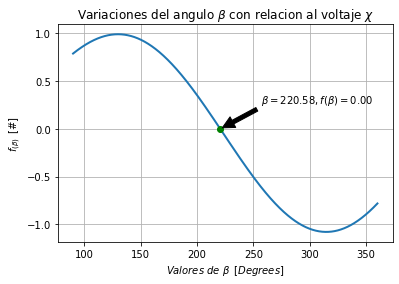

In [57]:
# Plot the points using matplotlib
plt.plot(angles, temp, lw=2)
plt.plot(x0, y0, 'go')

text = r'$\beta = {0:.2f}, f(\beta) = {1:.2f}$'.format(x0, math.fabs(y0))

plt.annotate(text, xy=(x0, y0), xytext=(x0 + xtext, ytext),
            arrowprops=dict(facecolor='black', shrink=0.05),)

plt.title(r'Variaciones del angulo $\beta$ con relacion al voltaje $\chi$')
plt.ylabel(r'$f_{\left(\beta\right)} \/\/\/ [\#]$')
plt.xlabel(r'$\mathit{Valores \/\/ de \/\/ \beta} \/\/\/[Degrees]$')
plt.grid(True)
plt.show()
